<a href="https://colab.research.google.com/github/MayankJha17/Predict-house-price-using-regression-/blob/main/PREDICT_HOUSE_PRICE_USING_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROJECT NAME 


---

PREDICT HOUSE PRICE USING REGRESSION


##DATA PREPROCESSING

---

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
##link of the dataset
url='https://raw.githubusercontent.com/MayankJha17/Predict-house-price-using-regression-/main/kc_house_data.csv'
##reading the dataset
dataset=pd.read_csv(url)
##printing the top 5 rows of the dataset
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
##printing the datatypes of the features of the dataset
dataset.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [3]:
##printing the dataset features 
column=dataset.columns
column

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
##printing the shape of the dataset
##no. of rows and no . of columns
dataset.shape

(21613, 21)

In [5]:
## 21 features
## 21613 datapoint
##checking any missing values in the dataset
l1=[]##creating the empty list to append the nan values of the features
for x in column:
  l1.append(dataset[x].isnull().sum())
##printing the list
print(l1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


###CHECKING THE OUTLIERS

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


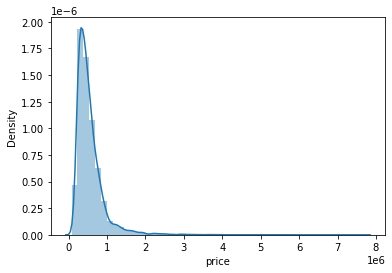

In [6]:
##above we can see that there is no. missing values to handle
##first to check the dependent variable 'price' behaviour towards itself
sns.distplot(dataset.price)##plotting the density function of the price

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


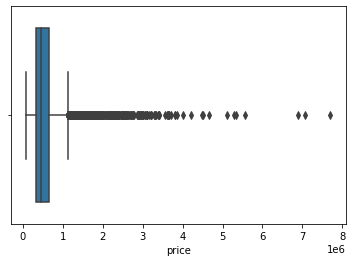

In [7]:
sns.boxplot(dataset.price)##plotting boxplot of the 'price'

In [8]:
##checking the unique values in the dependent feature 'feature'
len(set(dataset.price))##converting the array into the set to get the no. of unique feature 

4028

In [9]:
##printing the stats of the price
dataset.price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [10]:
##from above both plots the density of price greater than 20,00,000 is almost zero
##so we can drop the datapoint which have price greater than 20 lakhs
##it reduce the time and error after the training the model
(dataset.price > 2000000).sum()


198

In [11]:
##creating the copy of the dataset 
##deleting the 198 datapoints in the dataset
data=dataset.copy()
data=data[~(dataset.price > 2000000 )]
data=data.reset_index(drop=True)
##printing the data shape
data.shape

(21415, 21)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


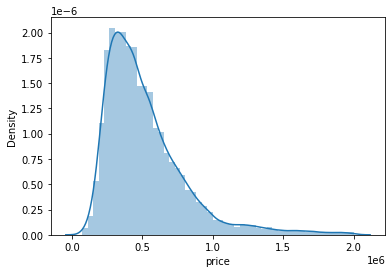

In [12]:
##again plotting distplot 
sns.distplot(data.price)

###HANDLING THE DATE_TIME FEATURE

In [13]:
##dropping the 'id'column
data.id

0        7129300520
1        6414100192
2        5631500400
3        2487200875
4        1954400510
            ...    
21410     263000018
21411    6600060120
21412    1523300141
21413     291310100
21414    1523300157
Name: id, Length: 21415, dtype: int64

In [14]:
data.drop('id', axis =1, inplace = True)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
##now trying to solve date feature
date=data.date
data['Date_new']=pd.Series(v[0:8]  for v in data['date'])##creating the new column 'Date_new'
##and slicing the date 
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Date_new
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,20141013
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,20141209
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,20150225
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,20141209
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,20150218


In [16]:
##droping the date feature
data=data.drop(['date'],axis=1)


In [17]:
data.head()##showing top 5 rows of the data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Date_new
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,20141013
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,20141209
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,20150225
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,20141209
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,20150218


In [18]:
##converting the date_new feature to date object
data['Date_new']=pd.to_datetime(data['Date_new'])

In [19]:
##printing the datatype of the Date_new feature
data.Date_new.dtypes

dtype('<M8[ns]')

In [20]:
##now seperating the year month from Date_new feature
data['year'] = pd.DatetimeIndex(data['Date_new']).year
data['month'] = pd.DatetimeIndex(data['Date_new']).month

In [21]:
##printing the data top 5 rows
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Date_new,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014-10-13,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014-12-09,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015-02-25,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014-12-09,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015-02-18,2015,2


In [22]:
##dropping the Date_new feature
data=data.drop('Date_new',axis=1)

In [23]:
##printing the data top 5 rows
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [24]:
##now printing the unique values in the year feature
data.year.unique()

array([2014, 2015])

In [25]:
##from above we can see that only two values are unique in year feature
##now printing the month unique feature
data.month.unique()

array([10, 12,  2,  5,  6,  1,  4,  3,  7,  8, 11,  9])

###PLOTTING DISCRETE FEATURE AGAINST DEPENDENT FEATURE 'PRICE

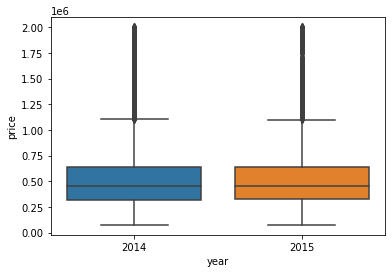

In [26]:
##plotting boxplot year vs price
sns.boxplot(x='year',y='price',data=data)

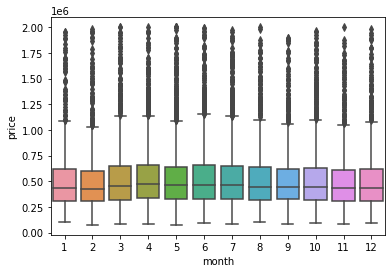

In [27]:
##above graph shows almost equal proportion of 2014 and 2015
##plotting boxplot month vs price
sns.boxplot(x='month',y='price',data=data)

In [28]:
##again no change in the month
##therefore dropping  month feature
data=data.drop('month',axis=1)

In [29]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


In [30]:
##printing no. of unique values in the data
for x in data.columns:
  print('{}  :   {}'.format(x,len(data[x].unique())))

price  :   3903
bedrooms  :   13
bathrooms  :   27
sqft_living  :   985
sqft_lot  :   9677
floors  :   6
waterfront  :   2
view  :   5
condition  :   5
grade  :   12
sqft_above  :   914
sqft_basement  :   293
yr_built  :   116
yr_renovated  :   70
zipcode  :   70
lat  :   5034
long  :   752
sqft_living15  :   765
sqft_lot15  :   8591
year  :   2


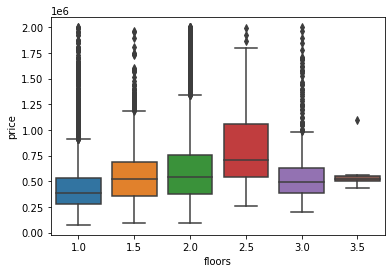

In [31]:
##floors , waterfront , view , condition
##plotting boxplot 
sns.boxplot(x='floors',y='price',data=data)

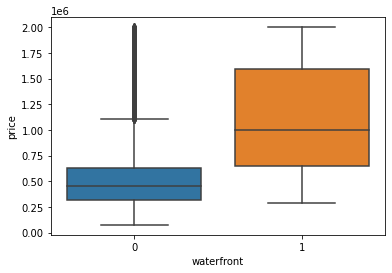

In [32]:
sns.boxplot(x='waterfront',y='price',data=data)

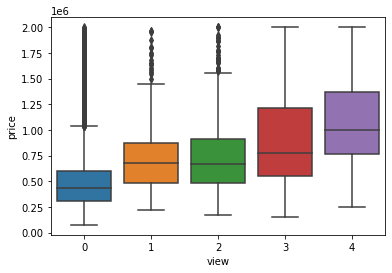

In [33]:
sns.boxplot(x='view',y='price',data=data)

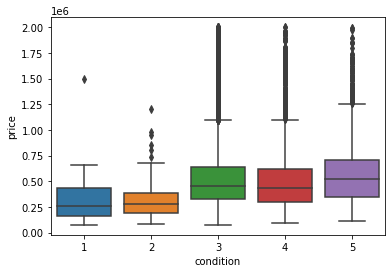

In [34]:
sns.boxplot(x='condition',y='price',data=data)

In [35]:
##from abovve plotting we can see that there is changes in the dependent variable as the independent variable chnages
##now we try to reduce the feature by using feature engineering techniques


##FEATURE ENGINEERING

---

FEATURE SCALING

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data1=data.copy()
data1=scaler.fit_transform(data1)
data1=pd.DataFrame(data1,columns=data.columns)
data1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,-1.033747,-0.391197,-1.469219,-1.009900,-0.226574,-0.910076,-0.074118,-0.297441,-0.628524,-0.552334,-0.740880,-0.660731,-0.545887,-0.207250,1.868820,-0.347473,-0.306995,-0.945581,-0.258561,-0.690577
1,0.064555,-0.391197,0.202477,0.599182,-0.188145,0.944103,-0.074118,-0.297441,-0.628524,-0.552334,0.507179,0.267558,-0.682355,4.812719,0.877677,1.161904,-0.746029,-0.422371,-0.185779,-0.690577
2,-1.179331,-1.472721,-1.469219,-1.484521,-0.121569,-0.910076,-0.074118,-0.297441,-0.628524,-1.430972,-1.257752,-0.660731,-1.296460,-0.207250,-0.936302,1.283489,-0.137046,1.117360,-0.170301,1.448065
3,0.293874,0.690327,1.205495,-0.106962,-0.242265,-0.910076,-0.074118,-0.297441,2.450121,-0.552334,-0.904766,1.451125,-0.204718,-0.207250,1.083386,-0.278407,-1.270038,-0.915683,-0.282345,-0.690577
4,-0.032733,-0.391197,-0.131862,-0.431093,-0.167916,-0.910076,-0.074118,-0.297441,-0.628524,0.326304,-0.110547,-0.660731,0.545855,-0.207250,-0.076064,0.412252,1.194219,-0.257934,-0.190756,1.448065


In [37]:
##from above there is no object dataypes
##seperating the train and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data1.drop(labels=['price'],axis=1),data1['price'],test_size=0.3,random_state=30)


In [38]:
##for information gain in regression problem we will use mutual_info_regression library in sklearn.feature_selection
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(x_train,y_train)
mutual_info

array([0.07082378, 0.18818726, 0.32855631, 0.0551929 , 0.07456444,
       0.01179372, 0.04127806, 0.00520091, 0.31542175, 0.23564672,
       0.05421616, 0.06931992, 0.01181291, 0.41012811, 0.33671907,
       0.10903416, 0.24628429, 0.07617111, 0.00990607])

In [39]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns
mutual_info=mutual_info.sort_values(ascending=False)
mutual_info

zipcode          0.410128
lat              0.336719
sqft_living      0.328556
grade            0.315422
sqft_living15    0.246284
sqft_above       0.235647
bathrooms        0.188187
long             0.109034
sqft_lot15       0.076171
floors           0.074564
bedrooms         0.070824
yr_built         0.069320
sqft_lot         0.055193
sqft_basement    0.054216
view             0.041278
yr_renovated     0.011813
waterfront       0.011794
year             0.009906
condition        0.005201
dtype: float64

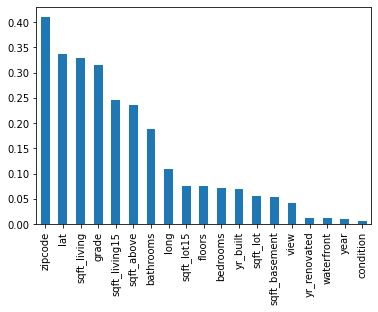

In [40]:
##plotting bar graph of above mutual_info
mutual_info.plot.bar()

In [41]:
##first we train the train the model without dropping any feature and if we get the good results we go ahead with hypertuning the models or otherwise 
## we will do feature enginnering once again by reverse-enginnering

##APPLYING THE VARIOUS MODELS AND MEASURING THE METRICS

---



In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [43]:
##APPLYING THE KNN REGRESSOR
knn_regressor=KNeighborsRegressor()
knn_regressor.fit(x_train,y_train)
y_predict=knn_regressor.predict(x_test)
r2_score(y_test,y_predict)

0.7792306334159906

In [44]:
##applying the decision tree regressor
Decision_regressor=DecisionTreeRegressor()
Decision_regressor.fit(x_train,y_train)
y_predict=Decision_regressor.predict(x_test)
r2_score(y_test,y_predict)

0.7325776392178917

In [45]:
##applying the svr regressor
svr_regressor=SVR(gamma='auto')
svr_regressor.fit(x_train,y_train)
y_predict=svr_regressor.predict(x_test)
r2_score(y_test,y_predict)

0.8295638606452467

In [46]:
##applying the svr regressor
svr_regressor=SVR(gamma='auto')
svr_regressor.fit(x_train,y_train)
y_predict=svr_regressor.predict(x_test)
r2_score(y_test,y_predict)

0.8295638606452467

###applying the ensemble method

In [47]:
import xgboost as xgb
xgb = xgb.XGBRegressor()
xgb.fit(x_train,y_train)

[13:42:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [48]:
predict_y=xgb.predict(x_test)
r2_score(y_test,predict_y)

0.8621479132624464

###applying the adaboost regressor

In [49]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [50]:
y_predict=ada.predict(x_test)

In [51]:
r2_score(y_test,y_predict)

0.5473798129144485

In [52]:
##from above adaboost technique does not fit well
##there are two more ensemble techniques 
##random forest regressor
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()

In [53]:
forest.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [54]:
y_predict=forest.predict(x_test)
r2_score(y_test,y_predict)

0.8719655443155222

In [55]:
##from above random forest give little bit higher accuracy than xgboost
##now finalizing the random forest regressor model
##we will do the cross validation to avoid model overfitting
from sklearn.model_selection import cross_val_score
y=data1['price']
x=data1.drop('price',axis=1)

In [58]:
cross_val_score(forest, x,y, cv =10,scoring='r2').mean()


0.8750643884657384

In [56]:
##from above we can say that the model gives the best accuracy of 87.50%